In [2]:
import pandas as pd
import numpy as np

# For counting number of instances
from collections import Counter

deb1 = pd.read_csv('tweets_debate1.csv')
deb2 = pd.read_csv('tweets_debate2.csv')
deb3 = pd.read_csv('tweets_debate3.csv')
debvp = pd.read_csv('tweets_debateVP.csv')
frames = [deb1, deb2, deb3, debvp]
df = pd.concat(frames, ignore_index=True)

df.head()

,userID,text,created_at,favorite_count,followers_account,friends_count,location
0,11344,Police start the presidential debate memes swi...,09/26/2016 21:00:00 EDT,1,123,96,"East Point, GA"
1,2061,"RT @thereaIbanksy: become the most positive, e...",09/26/2016 21:00:03 EDT,481,116,244,"Kansas City, MO USA"
2,22644,This is gonna be a stressful ass week.,09/26/2016 21:00:03 EDT,9930,176,163,"Dundee, Oregon"
3,9694,RT @KevinBracken4: #serviceselfie #T2Trun NY M...,09/26/2016 21:00:12 EDT,8135,235,136,NY Metro
4,9087,RT @HillaryClinton: Let's do this. #DebateNigh...,09/26/2016 21:00:13 EDT,141,70,163,"New York, NY"


In [2]:
df.shape

(60378, 7)

# Aggregate Tweets by user

In [4]:
df.groupby(['userID', 'text'])
df.head(5)

,userID,text,created_at,favorite_count,followers_account,friends_count,location
0,11344,Police start the presidential debate memes swi...,09/26/2016 21:00:00 EDT,1,123,96,"East Point, GA"
1,2061,"RT @thereaIbanksy: become the most positive, e...",09/26/2016 21:00:03 EDT,481,116,244,"Kansas City, MO USA"
2,22644,This is gonna be a stressful ass week.,09/26/2016 21:00:03 EDT,9930,176,163,"Dundee, Oregon"
3,9694,RT @KevinBracken4: #serviceselfie #T2Trun NY M...,09/26/2016 21:00:12 EDT,8135,235,136,NY Metro
4,9087,RT @HillaryClinton: Let's do this. #DebateNigh...,09/26/2016 21:00:13 EDT,141,70,163,"New York, NY"


In [5]:
tweets_by_user = df['text'].groupby(df['userID'])

In [6]:
type(tweets_by_user)

pandas.core.groupby.SeriesGroupBy

In [7]:
tweets_by_user.head(5)

0        Police start the presidential debate memes swi...
1        RT @thereaIbanksy: become the most positive, e...
2                   This is gonna be a stressful ass week.
3        RT @KevinBracken4: #serviceselfie #T2Trun NY M...
4        RT @HillaryClinton: Let's do this. #DebateNigh...
5        RT @hyperjeff: Why the Father of Modern Statis...
6        Eckerd College Ending Some Programs in St. Pet...
7        @Denver_dan @whizwhit @enjoyLaCroix this is em...
8        Oooooooo, Mad Hatter is coming! So pumped #Gotham
9        RT @WestPalmPD: Dive Team #Training. We get co...
10       @OliviaKMaynard @AnneBevan1 An invasion of pri...
11       RT @LemmaTony: Team HD will run T2T this am. T...
12       Readying 4 the debate with @MaricopaCountyDemo...
13       IN THIS CORNER… the repulsive mongoloid racist...
14       Helicopter or Snow Plow? What kind of parent a...
15          @BobRich04662764 Are you my friend "stick"????
16       @mishacollins I'll be watching the debate! Goo.

In [8]:
df.dtypes

userID                int64
text                 object
created_at           object
favorite_count        int64
followers_account     int64
friends_count         int64
location             object
dtype: object

In [9]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [10]:
RT = []
for t in df.text:
    RT.append(t.split()[0]=='RT')
df['RT'] = RT

In [11]:
df.head(5)

,userID,text,created_at,favorite_count,followers_account,friends_count,location,RT
0,11344,Police start the presidential debate memes swi...,2016-09-27 01:00:00,1,123,96,"East Point, GA",False
1,2061,"RT @thereaIbanksy: become the most positive, e...",2016-09-27 01:00:03,481,116,244,"Kansas City, MO USA",True
2,22644,This is gonna be a stressful ass week.,2016-09-27 01:00:03,9930,176,163,"Dundee, Oregon",False
3,9694,RT @KevinBracken4: #serviceselfie #T2Trun NY M...,2016-09-27 01:00:12,8135,235,136,NY Metro,True
4,9087,RT @HillaryClinton: Let's do this. #DebateNigh...,2016-09-27 01:00:13,141,70,163,"New York, NY",True


In [12]:
df.dtypes

userID                        int64
text                         object
created_at           datetime64[ns]
favorite_count                int64
followers_account             int64
friends_count                 int64
location                     object
RT                             bool
dtype: object

In [13]:
df.describe()

,userID,favorite_count,followers_account,friends_count
count,60378.000000,60378.000000,60378.000000,60378.000000
mean,11516.136838,7317.397280,2651.535576,1688.215310
std,6724.801878,25786.687507,13697.959984,11074.939779
min,6.000000,0.000000,1.000000,2.000000
25%,5526.000000,312.000000,204.000000,274.000000
50%,11505.000000,1348.000000,444.000000,535.000000
75%,17527.000000,4612.000000,1164.000000,1070.000000
max,22853.000000,310812.000000,197614.000000,172076.000000


In [14]:
unique_users = np.unique(df.userID)
all_users = {'influence': {user: 0 for user in unique_users},
             'count': dict(Counter(df.userID))}

In [26]:
len(unique_users)

3137

In [29]:
for user, L, R in zip(df.userID,
                      df.favorite_count,
                      df.followers_account):
    all_users['influence'][user] += (L + R)

In [30]:
all_users['ratio'] = {user: all_users['influence'][user]/all_users['count'][user] for user in unique_users}

In [31]:
# For sorting lists of tuples
import operator

sorted_users = {}
for key in all_users.keys():
    sorted_users[key] = sorted(all_users[key].items(), key=operator.itemgetter(1))[::-1]

In [32]:
for key in sorted_users.keys():
    print(key)
    print(np.array(sorted_users[key]).shape)

influence
(3137, 2)
count
(3137, 2)
ratio
(3137, 2)


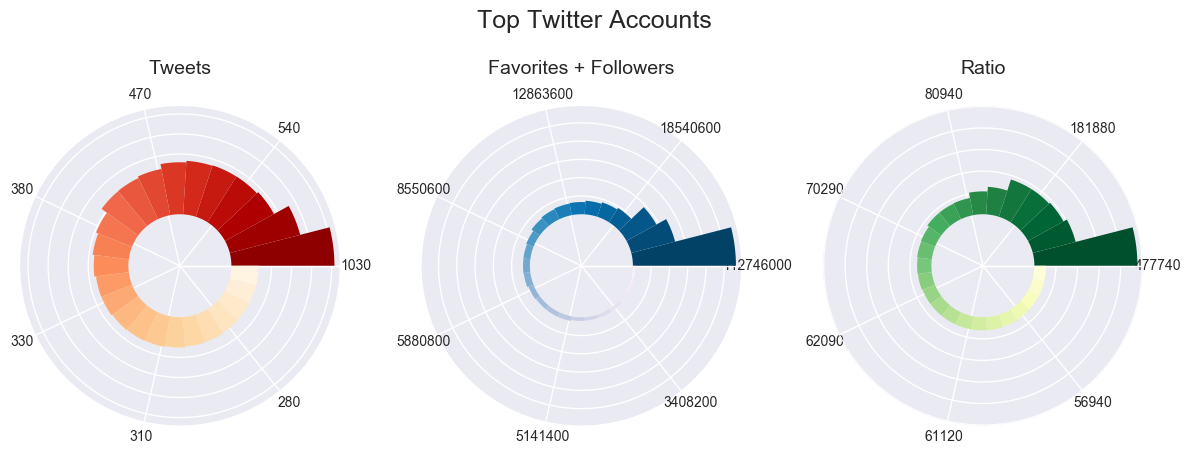

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

fig = plt.figure(figsize=(12, 8))

N = 25 # len(sorted_users['count'])

c1 = sns.color_palette("OrRd", N)
c2 = sns.color_palette("PuBu", N)
c3 = sns.color_palette("YlGn", N)




ax = plt.subplot(131, projection='polar')
x = np.linspace(0, 2*np.pi, N+1)[:-1]
y = [sorted_users['count'][i][1] for i in range(N)]
#y = np.log(y)
ax.bar(x, y, width=2*np.pi/N, color=c1[::-1], linewidth=0)

xtks = np.linspace(0, 2*np.pi, 8)
ax.set_xticks(xtks)
ax.set_xticklabels([str(round(y[int(x/np.pi/2*N)], -1)) for x in xtks[:-1]])
#ax.set_xticklabels([str(round(np.exp(y[int(x/np.pi/2*N)]), 0)) for x in xtks[:-1]])
ax.set_yticklabels([])
ax.set_ylim(-max(y)/2, max(y)*1.05)
ax.set_title('Tweets', y=1.08, fontsize=14)




ax = plt.subplot(132, projection='polar')
x = np.linspace(0, 2*np.pi, N+1)[:-1]
y = [sorted_users['influence'][i][1] for i in range(N)]
#y = np.log(y)
ax.bar(x, y, width=2*np.pi/N, color=c2[::-1], linewidth=0)

xtks = np.linspace(0, 2*np.pi, 8)
ax.set_xticks(xtks)
ax.set_xticklabels([str(round(y[int(x/np.pi/2*N)], -2)) for x in xtks[:-1]])
#ax.set_xticklabels([str(round(np.exp(y[int(x/np.pi/2*N)]), 0)) for x in xtks[:-1]])
ax.set_yticklabels([])
ax.set_ylim(-max(y)/2, max(y)*1.05)
ax.set_title('Favorites + Followers', y=1.08, fontsize=14)




ax = plt.subplot(133, projection='polar')
x = np.linspace(0, 2*np.pi, N+1)[:-1]
y = [sorted_users['ratio'][i][1] for i in range(N)]
#y = np.log(y)
ax.bar(x, y, width=2*np.pi/N, color=c3[::-1], linewidth=0)

xtks = np.linspace(0, 2*np.pi, 8)
ax.set_xticks(xtks)
ax.set_xticklabels([str(int(round(y[int(x/np.pi/2*N)], -1))) for x in xtks[:-1]])
#ax.set_xticklabels([str(round(np.exp(y[int(x/np.pi/2*N)]), 0)) for x in xtks[:-1]])
ax.set_yticklabels([])
ax.set_ylim(-max(y)/2, max(y)*1.05)
ax.set_title('Ratio', y=1.08, fontsize=14)




plt.tight_layout()
plt.suptitle('Top Twitter Accounts', y=0.82, fontsize=18)
plt.show()

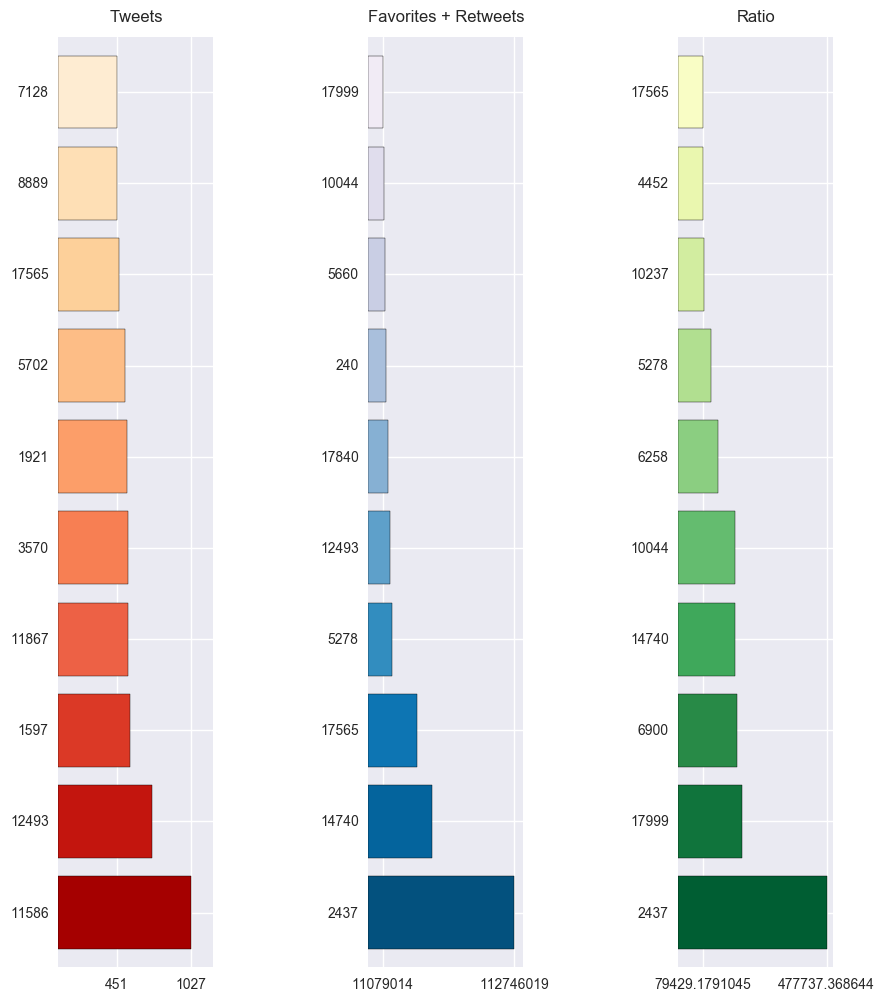

In [34]:
fig = plt.figure(figsize=(10, 12))

N = 10

c1 = sns.color_palette("OrRd", N)
c2 = sns.color_palette("PuBu", N)
c3 = sns.color_palette("YlGn", N)

ax = plt.subplot(131)
x = np.arange(0, 10, 1)
y = [sorted_users['count'][i][1] for i in range(10)]
ax.barh(x, y, color=c1[::-1])
ax.set_title('Tweets', y=1.01)
ax.set_yticks(x+0.4)
ax.set_yticklabels([sorted_users['count'][i][0] for i in range(10)])
ax.set_ylim(-0.2, 10)
ax.set_xticks([y[0], y[9]])
ax.set_xticklabels([y[0], y[9]])
plt.setp(ax.get_yticklines(), visible=False)

ax = plt.subplot(132)
x = np.arange(0, 10, 1)
y = [sorted_users['influence'][i][1] for i in range(10)]
ax.barh(x, y, color=c2[::-1])
ax.set_title('Favorites + Retweets', y=1.01)
ax.set_yticks(x+0.4)
ax.set_yticklabels([sorted_users['influence'][i][0] for i in range(10)])
ax.set_ylim(-0.2, 10)
ax.set_xticks([y[0], y[9]])
ax.set_xticklabels([y[0], y[9]])
plt.setp(ax.get_yticklines(), visible=False)

ax = plt.subplot(133)
x = np.arange(0, 10, 1)
y = [sorted_users['ratio'][i][1] for i in range(10)]
ax.barh(x, y, color=c3[::-1])
ax.set_title('Ratio', y=1.01)
ax.set_yticks(x+0.4)
ax.set_yticklabels([sorted_users['ratio'][i][0] for i in range(10)])
ax.set_ylim(-0.2, 10)
ax.set_xticks([y[0], y[9]])
ax.set_xticklabels([y[0], y[9]])
plt.setp(ax.get_yticklines(), visible=False)

plt.subplots_adjust(wspace=1.0)

plt.show()

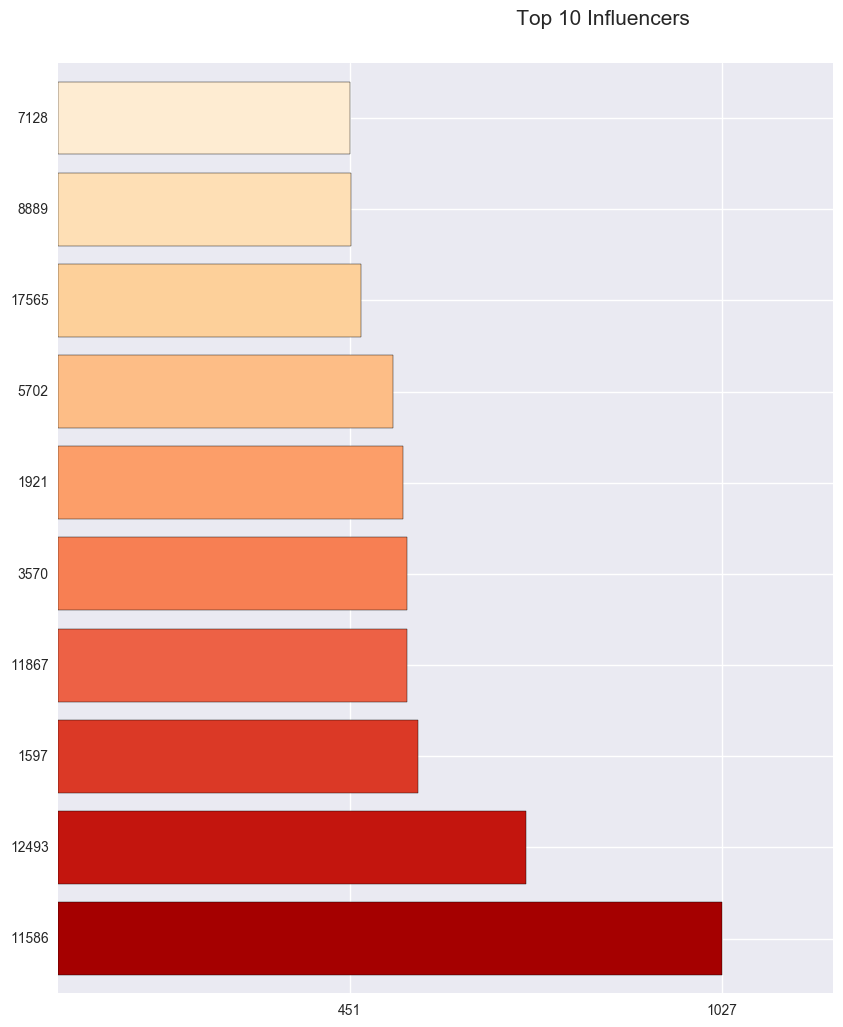

In [35]:
fig = plt.figure(figsize=(10, 12))

N = 10

c1 = sns.color_palette("OrRd", N)
c2 = sns.color_palette("PuBu", N)
c3 = sns.color_palette("YlGn", N)

ax = fig.add_subplot(111)
x = np.arange(0, 10, 1)
y = [sorted_users['count'][i][1] for i in range(10)]
ax.barh(x, y, color=c1[::-1])
ax.set_title('', y=1.01)
ax.set_yticks(x+0.4)
ax.set_yticklabels([user for user in [sorted_users['count'][i][0] for i in range(10)]])
ax.set_ylim(-0.2, 10)
ax.set_xticks([y[0], y[9]])
ax.set_xticklabels([y[0], y[9]])
plt.setp(ax.get_yticklines(), visible=False)

ax.set_title('',
             style='italic', y=1.01, fontsize=10)
plt.suptitle('                                                           Top 10 Influencers', y=0.945, fontsize=15)

plt.subplots_adjust(wspace=1.0)

plt.show()

In [36]:
def readInData(filename):
    #read in files and remove missing values
    ds = pandas.read_csv(filename) 
    ds = ds[ds.AirTemp != 'M']
    #set index to date
    ds['Date'] = pandas.to_datetime(ds.Date, yearfirst=True, errors='coerce')
    ds.Date = pandas.DatetimeIndex(ds.Date)
    ds.index = ds.Date
    #group by time (so group readings by time of day of reading, i.e. all readings at midnight)
    dg = ds.groupby(ds.index.time)

    #initialize the final dataframe
    df = pandas.DataFrame()
    for name, group in dg: #for each group
        #each group is a dateframe
        try:
            #set unique column names except for date
            group.columns = ['Date', 'WaterTemp'+str(name), 'Discharge'+str(name), 'AirTemp'+str(name), 'Precip'+str(name)]
            #ensure date is the index            
            group.index = group.Date
            #remove time from index
            group.index = group.index.normalize()
            #join based on date
            df = pandas.concat([df, group], axis=1)
        except: #if the try catch block isn't here, throws errors! (three for my dataset?)
            pass
    #remove duplicate date columns
    df = df.loc[:,~df.columns.duplicated()]
    #since date is index, drop the first date column
    df = df.drop('Date', 1)
    #return the dataset
    return df

In [37]:
df.head(5)

,userID,text,created_at,favorite_count,followers_account,friends_count,location,RT
0,11344,Police start the presidential debate memes swi...,2016-09-27 01:00:00,1,123,96,"East Point, GA",False
1,2061,"RT @thereaIbanksy: become the most positive, e...",2016-09-27 01:00:03,481,116,244,"Kansas City, MO USA",True
2,22644,This is gonna be a stressful ass week.,2016-09-27 01:00:03,9930,176,163,"Dundee, Oregon",False
3,9694,RT @KevinBracken4: #serviceselfie #T2Trun NY M...,2016-09-27 01:00:12,8135,235,136,NY Metro,True
4,9087,RT @HillaryClinton: Let's do this. #DebateNigh...,2016-09-27 01:00:13,141,70,163,"New York, NY",True


In [16]:
tweets_by_user = df.groupby('userID')['text'].apply(lambda x: x.sum())

In [17]:
type(tweets_by_user)

pandas.core.series.Series

In [22]:
row1 = tweets_by_user[0:1]

In [23]:
row1

userID
6    There is one on my train too. https://t.co/CuI...
Name: text, dtype: object

In [24]:
tweets_by_user[0:5]

userID
6     There is one on my train too. https://t.co/CuI...
9     RT @LiveFreedomOrDi: The "life of the mother" ...
11    Broken toes and fracture .... https://t.co/C35...
27    @jrlikeswhisky Its been a tough one no doubt.....
51    RT @WIRED: Fact check: Saying "how stupid is o...
Name: text, dtype: object

In [25]:
tweets_by_user.shape

(3137,)

In [39]:
output_file = "tweets_by_user.csv"
tweets_by_user.to_csv(output_file, header="'userID', 'text'")

In [43]:
df2 = tweets_by_user.to_frame()
df2.head(5)

,text
userID,
6,There is one on my train too. https://t.co/CuI...
9,"RT @LiveFreedomOrDi: The ""life of the mother"" ..."
11,Broken toes and fracture .... https://t.co/C35...
27,@jrlikeswhisky Its been a tough one no doubt.....
51,"RT @WIRED: Fact check: Saying ""how stupid is o..."


In [44]:
output_file = "tweets_by_user_excel.xlsx"
df2.to_excel(output_file, header="'userID', 'text'")

/Users/carrie/anaconda/lib/python3.5/site-packages/xlsxwriter/worksheet.py:829: UserWarning: Ignoring URL 'https://t.co/2DGeqmWEPjDid%20Trump%20just%20say%20illegal%20immigrants%20are%20carrying%20guns%20and%20kiling%20people!?%20WOW!%20' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
/Users/carrie/anaconda/lib/python3.5/site-packages/xlsxwriter/worksheet.py:829: UserWarning: Ignoring URL 'https://t.co/cOOyWm7qPu...%20This%20is%20real?%20' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
/Users/carrie/anaconda/lib/python3.5/site-packages/xlsxwriter/worksheet.py:829: UserWarning: Ignoring URL 'https://t.co/JG7V4KqnjZhttps://t.co/4b6qjEpNeBhttps://t.co/t6u4HP9q8Xhttps://t.co/tkHQ7kF3pQhttps://t.co/tkHQ7kF3pQhttps://t.co/t6u4HP9q8Xhttps://t.co/4b6qjEpNeBhttps://t.co/JG7V4KqnjZRegister%20to%20vote%20today!%20https://t.co/hlZOdPxNXqhttps://t.co/U1PDnOSsm5https://t.co/sCc3O

In [19]:
cols = ['handle', 'text', 'fav', 'location']
poli_tweets = pd.read_csv('output.csv', usecols=cols)
len(poli_tweets)

3361

In [20]:
poli_tweets.head(15)

,handle,text,fav,location
0,@RealDonaldTrump,'General Kelly is doing a great job at the bor...,86087,None
1,@RealDonaldTrump,'Democrats are smiling in D.C. that the Freedo...,57682,None
2,@RealDonaldTrump,'Thanks you for all of the Trump Rallies today...,110030,None
3,@RealDonaldTrump,'Watch @JudgeJeanine on @FoxNews tonight at 9:...,47659,None
4,@RealDonaldTrump,'ObamaCare will explode and we will all get to...,98910,None
5,@RealDonaldTrump,'Happy #MedalOfHonorDay to our heroes! \\u27a1...,63726,None
6,@RealDonaldTrump,"'Today, I was thrilled to announce a commitmen...",85464,None
7,@RealDonaldTrump,"'Today, I was pleased to announce the official...",63885,None
8,@RealDonaldTrump,"'The irony is that the Freedom Caucus, which i...",59729,None
9,@RealDonaldTrump,'After seven horrible years of ObamaCare (skyr...,66039,None


In [21]:
tweets_by_politician = poli_tweets.groupby('handle')['text'].apply(lambda x: x.sum())

In [23]:
row1 = tweets_by_politician[0:1]
row1

handle
@BernieSanders    'We now must take on a horrific Republican bud...
Name: text, dtype: object

In [24]:
len(tweets_by_politician)

20

In [26]:
output_file = "tweets_by_politicians_excel.xlsx"
df3 = tweets_by_politician.to_frame()
df3.to_excel(output_file, header="'handle', 'text'")

In [28]:
df = pd.read_csv("tweets_by_politicians_excel.csv")
df

,handle,text,party
0,@BernieSanders,'We now must take on a horrific Republican bud...,D
1,@CoryBooker,'Honored to do so and so proud of them. https:...,D
2,@DrJillStein,'RT @CheriHonkala: Our democracy means nothing...,I
3,@GOPLeader,'RT @AIPAC: SPEAKING NOW: @GOPLeader &amp; @Wh...,R
4,@GovGaryJohnson,'Watch LIVE from the #ElectionNight party- htt...,I
5,@HillaryClinton,'Today was a victory for all Americans. https:...,D
6,@LindseyGrahamSC,Graham: Left is 'going insane' after Trump's w...,R
7,@NancyPelosi,'If you are invested in the fight against #Tru...,D
8,@PattyMurray,'President Trump is trying to change the #Trum...,D
9,@RealDonaldTrump,'General Kelly is doing a great job at the bor...,R
